# KFold Cross Validation

#### Importing the dependencies

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

##### Importing the models

In [19]:
# Classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

##### Data Collection & Preprocessing

In [20]:
data = pd.read_csv(r"D:\ai_ds-General\dataset\heart_v1.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
data.shape

(303, 14)

In [22]:
# Checking Missing Values (whole data)
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [23]:
# checking the distribution of Target Variable (Checking balance or imbalance), 1: Defective Heart, 2:Healthy Heart
data['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

### Splitting the features & targets 

In [24]:
X = data.drop(columns=['target'], axis=1)
y = data['target']

In [25]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [26]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### Train Test Split

In [27]:
# initialize train test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=.2, random_state=3) 

# check shape
print(X.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(303, 13) (242, 13) (61, 13) (242,) (61,)


In [28]:
242/303

0.7986798679867987

# Modeling

#### Compare the performance of the models

In [29]:
# list of models
models = [LogisticRegression(max_iter=1000), SVC(kernel='linear'), KNeighborsClassifier(), RandomForestClassifier()]

In [30]:
# compare models based on train_test_split fun
def compare_models_train_test():
    
    # training each model indiviaually
    for model in models:
        
        # fit/train the model
        model.fit(X_train, y_train)
        
        # evaluating the model
        train_data_prediction = model.predict(X_test)
        
        # Accuracy
        accuracy = accuracy_score(y_test, train_data_prediction) # actual: y_test,  pred: train_data_prediction
        
        # Print results
        print('Accuracy Score of the', model, ' = ', accuracy)

In [31]:
# calling function for model selection
compare_models_train_test()

Accuracy Score of the LogisticRegression(max_iter=1000)  =  0.7704918032786885
Accuracy Score of the SVC(kernel='linear')  =  0.7704918032786885
Accuracy Score of the KNeighborsClassifier()  =  0.6557377049180327
Accuracy Score of the RandomForestClassifier()  =  0.7868852459016393


# Cross Validation ( Experiment one by one model)

We will use cross val score in replace of Train test split, because it more relible over train test split

#### a) Logistic Regression (cv)

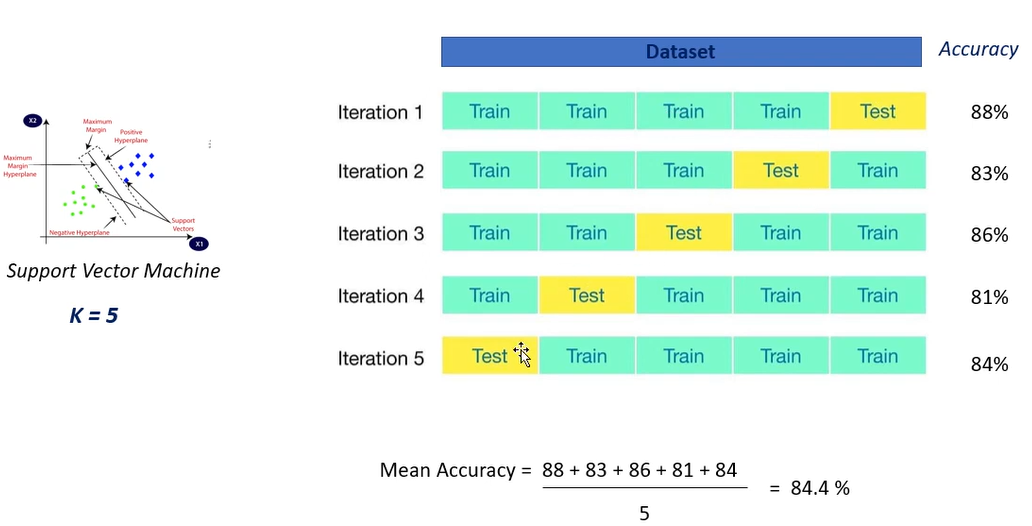

#### a.1 cv implementation

In [40]:
cv_score_lr = cross_val_score(LogisticRegression(max_iter=1100), X, y, cv=5)  # default give error : max_iter=1000
print(cv_score_lr) # as per cv=5, it will return a list of 5 accuracy value, if train test split used then we got 1 value
mean_accuracy_lr = sum(cv_score_lr)/len(cv_score_lr) # average
mean_accuracy_lr = mean_accuracy_lr*100              # percentage conversion
mean_accuracy_lr = round(mean_accuracy_lr, 2)        # rounding
print(mean_accuracy_lr)                              # printing

[0.80327869 0.86885246 0.85245902 0.86666667 0.75      ]
82.83


- cv_score_lr = cross_val_score(LogisticRegression(max_iter=1000), X, y, cv=5)
- Here, cross_val_score is taking X, y (ignoring to take train & test (X,y)]
- X, y is taking as alternative of X_train, x_test, y_train, y_test
- its worknig on full data (X,y) & spliting entire data in differnet subsets and worknig on this folds, so Train & test ignoring
- this cross_val_score will do all the spliting & evaluation process by itself
- here mentioning cv=5 that mean we will take five diffent subset/folds
- if cv used, it mean that it will use Stratified Kfold method automatically
- train test split : works for sinlge folds/ split, while cross val work for multiple splits for better evaluation

#### b) Support Vector Classifier (cv)

In [41]:
cv_score_svc = cross_val_score(SVC(kernel='linear'), X, y, cv=5)
print(cv_score_svc)
mean_accuracy_svc = sum(cv_score_svc)/ len(cv_score_svc)
mean_accuracy_svc = mean_accuracy_svc*100
mean_accuracy_svc = round(mean_accuracy_svc, 2)
print(mean_accuracy_svc)

[0.81967213 0.8852459  0.80327869 0.86666667 0.76666667]
82.83


#### c) KNeighborsClassifier (cv)

In [42]:
cv_score_knc = cross_val_score(KNeighborsClassifier(), X, y, cv=5) # let go with default params for KNeighborsClassifer
print(cv_score_knc)
mean_accuracy_knc = sum(cv_score_knc)/len(cv_score_knc)
mean_accuracy_knc = mean_accuracy_knc*100
mean_accuracy_knc = round(mean_accuracy_knc,2)
print(mean_accuracy_knc)

[0.60655738 0.6557377  0.57377049 0.73333333 0.65      ]
64.39


#### d) RandomForestClassifier(cv)

In [44]:
cv_score_rfc = cross_val_score(RandomForestClassifier(), X, y, cv=5)
print(cv_score_rfc)
mean_accuracy_rfc = sum(cv_score_rfc)/ len(cv_score_rfc)
mean_accuracy_rfc = mean_accuracy_rfc*100
mean_accuracy_rfc = round(mean_accuracy_rfc,2)
print(mean_accuracy_rfc)

[0.81967213 0.90163934 0.81967213 0.83333333 0.75      ]
82.49


# Cross Validation (Automation)

##### As per above one by one experiment, lets explore how we can create a function and apply all (n number of model) at time, instead of applying one by one!

### Creating Function to compare the models

In [48]:
# list of models
models = [LogisticRegression(max_iter=1100), SVC(kernel='linear'), KNeighborsClassifier(), RandomForestClassifier()]

In [53]:
# create fuction
def compare_models_cross_validation():
    
    for model in models:                   # accessing all models train & test one after one & store in var 'model'                              
        cv_score = cross_val_score(model, X, y, cv=5)  # not mentioning any particular model name, rather model (var, that mentioned just after 'for', not models)
        mean_accuracy = sum(cv_score) / len(cv_score) # avearage
        mean_accuracy = mean_accuracy*100             # percentage conversion
        mean_accuracy = round(mean_accuracy,2) 
        
        # print
        print('Cross Validation Accuracies', model, '= ', cv_score)              # accuracy perc
        print('Average Accuracy Percentage of the ', model, '= ', mean_accuracy) # Mean accuracy
        print('-----------------------------------------------')                  # Seperator


In [54]:
# calling function
compare_models_cross_validation()

Cross Validation Accuracies LogisticRegression(max_iter=1100) =  [0.80327869 0.86885246 0.85245902 0.86666667 0.75      ]
Average Accuracy Percentage of the  LogisticRegression(max_iter=1100) =  82.83
-----------------------------------------------
Cross Validation Accuracies SVC(kernel='linear') =  [0.81967213 0.8852459  0.80327869 0.86666667 0.76666667]
Average Accuracy Percentage of the  SVC(kernel='linear') =  82.83
-----------------------------------------------
Cross Validation Accuracies KNeighborsClassifier() =  [0.60655738 0.6557377  0.57377049 0.73333333 0.65      ]
Average Accuracy Percentage of the  KNeighborsClassifier() =  64.39
-----------------------------------------------
Cross Validation Accuracies RandomForestClassifier() =  [0.85245902 0.8852459  0.81967213 0.8        0.78333333]
Average Accuracy Percentage of the  RandomForestClassifier() =  82.81
-----------------------------------------------


#### Function interpretation

1. for model: This 'model' will iterate/ take 4 diffent model from the models list
2. this model:for each model it will iterate 5 times as per cv values provided ( train & test)
3. this model also to be passed in cross_val_score "param" model not models, this model will iterate in models list

#### Steps

1. list of models
2. Create a function to compare the models 'compare_models_cross_validation'
3. apply loop for accessing each model and train test (folds i.g 5 or 5 iteration)
4. print
5. calling function

##### Recommendation: Try on different dataset & more practices

<center> <h2> Notes </h2> </center>

## 1.0 Imbance & Balance Dataset

A balanced data set is one where the classes are approximately equally represented. An imbalanced data set is one where there is a significant difference between the number of instances of each class1.

In your case, the target variable has two classes: 1 and 0. The class 1 has 165 instances, while the class 0 has 138 instances. The difference between the two classes is not very large, so this data set can be considered balanced.

However, if the difference between the classes was much larger, such as 165 vs 15, then the data set would be imbalanced. This could cause problems for some machine learning algorithms, as they might learn to favor the majority class and ignore the minority class. In such cases, you might need to use some techniques to balance the data set, such as over-sampling, under-sampling, or synthetic data generation

#### Q1. What is the ideal ratio for considering balance vs imbalance data ?

There is no definitive answer to what constitutes a balanced or imbalanced data set, as it may depend on the context, the problem, and the algorithm you are using. However, some general guidelines are:

A balanced data set is one where the classes are approximately equally represented. For example, a 50:50 or 60:40 split between two classes would be considered balanced

An imbalanced data set is one where there is a significant difference between the number of instances of each class. For example, a 10:90 or 1:99 split between two classes would be considered imbalanced

The degree of imbalance can be mild, moderate, or extreme, depending on the proportion of the minority class. For example, a binary classification problem with a minority class of 20-40% of the data set would be mildly imbalanced, while one with a minority class of less than 1% of the data set would be extremely imbalanced

#### Q2. Explain Over Sampling Technique

Over-sampling is a technique for dealing with imbalanced data sets, where the number of instances of one class is much lower than the other classes. Over-sampling involves randomly duplicating examples from the minority class, with or without replacement, and adding them to the training data set. This way, the class distribution becomes more balanced and the learning algorithm can better capture the characteristics of the minority class

However, over-sampling also has some drawbacks, such as increasing the computational cost and the risk of overfitting. Overfitting occurs when the model learns the noise or specific patterns of the minority class that are not generalizable to new data. To avoid overfitting, some variations of over-sampling have been proposed, such as Synthetic Minority Oversampling Technique (SMOTE), which creates new synthetic examples from the minority class instead of simply replicating them

#### Q3. Explain Under Sampling Technique

Under-sampling is a technique for dealing with imbalanced data sets, where the number of instances of one class is much lower than the other classes. Under-sampling involves randomly removing examples from the majority class, with or without replacement, and reducing the size of the training data set. This way, the class distribution becomes more balanced and the learning algorithm can better capture the characteristics of the minority class

However, under-sampling also has some drawbacks, such as losing potentially useful information and increasing the risk of underfitting. Underfitting occurs when the model fails to learn the general patterns of the data and performs poorly on new data. To avoid underfitting, some variations of under-sampling have been proposed, such as Tomek Links, Edited Nearest Neighbors, and One-Sided Selection, which remove only the noisy or borderline examples from the majority class

#### Q4. Explain Synthetic data concept for handing imbalance dataset

Synthetic data is a technique for handling imbalanced data sets, where the number of instances of one class is much lower than the other classes. Synthetic data involves creating new examples from the minority class that are not present in the original data set, but are similar enough to represent its characteristics. This way, the class distribution becomes more balanced and the learning algorithm can better capture the features of the minority class

There are different methods for generating synthetic data, such as SMOTE (Synthetic Minority Oversampling Technique), MBS (Model-Based Synthetic Sampling), and SYNAuG (Synthetic Augmentation). These methods use different approaches, such as interpolation, modeling, or augmentation, to create new synthetic examples from the minority class

Synthetic data can help overcome some of the drawbacks of traditional sampling techniques, such as data loss, data duplication, or overfitting. However, synthetic data also has some challenges, such as ensuring the quality, validity, and diversity of the generated data, and avoiding introducing unwanted biases or noise

## 2.0 Rules for Train Test Split

- Step 1: Import module 'from sklearn.model_selection import train_test_split'
- Step 2: Seperate X & y first	
- Step 3: Initialize Train Test spit > pass (X, y, test_size, stratify = y (optional), random_stat)
- Step 4: Check & verify shape(X, y) Train vs train, test vs test shape must be same

##### Q1 Explain the concept of 'Stratify=y' in Train Test Split, y (dependent variable)

The stratify parameter in the train_test_split function is used to split the data in a stratified fashion, meaning that the proportion of classes in the original data is preserved in the train and test sets. For example, if you have a binary classification problem with 60% of the data belonging to class 0 and 40% to class 1, setting stratify=Y will ensure that the train and test sets have the same ratio of 0s and 1s. This can help to avoid bias and improve the generalization of the model.


## Models

#### Q6 what is meat by Kernel='linear' ?

The kernel parameter in the SVC function specifies the type of hyperplane used to separate the data. A hyperplane is a boundary that divides the data into different classes. A linear kernel means that the hyperplane is a straight line (or a plane in higher dimensions). A linear kernel is suitable for data that is linearly separable, meaning that a line can separate the data without errors.

#### Convergence error

C:\python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
  
This error comes due to non scale of data, can be soved either by data standardization or apply max iter to get convegence point (optimal point)

#### Q How cross val score works ?

Cross_val_score is a function in scikit-learn that evaluates the performance of a machine learning model by using cross-validation. Cross-validation is a technique that splits the data into multiple subsets, and trains and tests the model on each subset. This way, the model can be assessed on how well it generalizes to different data sets, and avoid overfitting. Cross_val_score returns a score for each subset, and the mean and standard deviation of these scores can be used to compare different models or parameters
Cross val score split the data into different subset and also provide the validtion faclities of diffenent model compararison

#### Q3 how cross val score is more reliable over train test split ?

Cross_val_score is more reliable over train_test_split because it uses multiple subsets of the data for training and testing, instead of just one. This way, the model can be evaluated on how well it generalizes to different data sets, and avoid overfitting. Cross_val_score also allows you to compare different models or parameters by using the mean and standard deviation of the scores across the folds. Train_test_split, on the other hand, only gives you one sample point of evaluation, which may not be representative of the model’s performance on unseen data. 

#### Q2. What is the advance of using cross validation scores ?

The advantage of using cross_val_score is that it provides a more reliable estimate of the model’s performance on unseen data, by using multiple subsets of the data for training and testing. This way, the model can be evaluated on how well it generalizes to different data sets, and avoid overfitting. Cross_val_score also allows you to compare different models or parameters by using the mean and standard deviation of the scores across the folds. While in case of using Kfold need to train & test the models seperately

#### Q3. Cross val score vs KFolds

Cross_val_score does not perform better or worse on KFold method, but rather uses it as one of the possible ways to implement cross-validation. Cross_val_score is a function that evaluates the performance of a model by using cross-validation, which is a technique that splits the data into multiple subsets, and trains and tests the model on each subset. KFold is a class that defines how to split the data into k non-overlapping folds, where each fold is used as a test set once, and the rest as training sets. Cross_val_score can take KFold as an argument for the cv parameter, which specifies the cross-validation splitting strategy. Alternatively, cross_val_score can also take an integer as the cv parameter, which means the number of folds to use for cross-validation. In this case, cross_val_score will use StratifiedKFold for classification problems, and KFold for regression problems, by default

cross_val_score, Kfolds & Stratifed Kfold these are functions
KFolds: only split the data into train & test, need to do to train the model seperately, while cross_val do all at once
stratifed Kfolds: the proportion (ratio) of train & test data will be kind of similar 
cross_val_score: is more reliable before its evaluating on differnet score of dataset

### Take Away

1. Changing random state value will effect in model score